- single LSTM layer Keras
- SKLearn MinMaxScaler on Numeric Vars
- One-hot-encoded class variables

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [92]:
tha = pd.read_csv('./data/avocado.csv').drop('Unnamed: 0',1)

In [354]:
tha.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [355]:
len(tha)

18249

In [108]:
X = tha[['Total Volume','4046','4225','4770',
         'Total Bags','Small Bags','Large Bags',
         'XLarge Bags','type','region']]
X = pd.get_dummies(X)

In [109]:
tmp = pd.to_datetime(tha.Date)
min_date = min(tmp)

In [110]:
min_date

Timestamp('2015-01-04 00:00:00')

In [111]:
def get_int_val(x):
    dt_x = pd.to_datetime(x)
    val = dt_x - min_date
    return val.days

In [112]:
X['date'] = tha.Date.map(lambda x: get_int_val(x))

In [113]:
X = X.astype('float32')

In [114]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(X)

In [115]:
Y = tha.AveragePrice

In [228]:
X_train, X_test, y_train, y_test = train_test_split(scaled, Y, 
                                        test_size=0.33, random_state=5432)

In [199]:
X_train.shape[0], X_train.shape[1]

(12226, 1)

# Bayesian Ridge

In [408]:
from sklearn.linear_model import BayesianRidge
X_train, X_test, y_train, y_test = train_test_split(scaled, Y, 
                                        test_size=0.33, random_state=5432)

In [409]:
br = BayesianRidge()

In [410]:
br.fit(X_train,y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [415]:
br_coefs = pd.DataFrame({'Feature' : X.columns, 'Absolute_Coefs': br.coef_})
br_coefs.Absolute_Coefs = br_coefs.Absolute_Coefs.apply(lambda x: abs(x))

In [422]:
pd.DataFrame(br_coefs.sort_values(by='Absolute_Coefs', ascending=False))

Absolute_Coefs                     Feature
7         0.521649                 XLarge Bags
27        0.414058  region_HartfordSpringfield
52        0.372869         region_SanFrancisco
28        0.360138              region_Houston
21        0.332042        region_DallasFtWorth
38        0.308610              region_NewYork
55        0.301239         region_SouthCentral
6         0.258960                  Large Bags
9         0.247836                type_organic
8         0.247836           type_conventional
50        0.219510           region_Sacramento
42        0.209443         region_Philadelphia
39        0.205027            region_Northeast
64        0.203872                        date
19        0.202227     region_CincinnatiDayton
32        0.187000           region_LosAngeles
22        0.180415               region_Denver
43        0.177463        region_PhoenixTucson
17        0.176257            region_Charlotte
36        0.173898            region_Nashville
47        0.168873    region_RaleighGreensboro
10        0.158383               region_Albany
20        0.152846             region_Columbus
49        0.147219              region_Roanoke
18        0.143715              region_Chicago
63        0.128295     region_WestTexNewMexico
23        0.125905              region_Detroit
12        0.123722  region_BaltimoreWashington
14        0.122562               region_Boston
33        0.122478           region_Louisville
..             ...                         ...
15        0.104629     region_BuffaloRochester
24        0.103451          region_GrandRapids
59        0.103106             region_Syracuse
41        0.098336              region_Orlando
26        0.096679   region_HarrisburgScranton
29        0.088027         region_Indianapolis
5         0.085979                  Small Bags
46        0.084987             region_Portland
25        0.078497           region_GreatLakes
13        0.067606                region_Boise
57        0.062286              region_Spokane
2         0.061771                        4225
11        0.061188              region_Atlanta
40        0.058593   region_NorthernNewEngland
1         0.055219                        4046
31        0.047968             region_LasVegas
53        0.040790              region_Seattle
44        0.040370           region_Pittsburgh
0         0.039065                Total Volume
3         0.034913                        4770
58        0.033262              region_StLouis
61        0.022950              region_TotalUS
16        0.020125           region_California
51        0.019405             region_SanDiego
45        0.016535               region_Plains
54        0.013893        region_SouthCarolina
56        0.010408            region_Southeast
60        0.007123                region_Tampa
35        0.005128             region_Midsouth
34        0.004449    region_MiamiFtLauderdale

[65 rows x 2 columns]

In [406]:
len(br.coef_)

79

In [407]:
len(X.columns)

65

In [212]:
br_preds = br.predict(X_test,y_test)

In [218]:
len(X_test), len(y_test), len(br_preds)

(6023, 6023, 2)

In [243]:
rmse = sqrt(mean_squared_error(y_test, br_preds[0]))
rmse

0.2637642588967485

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


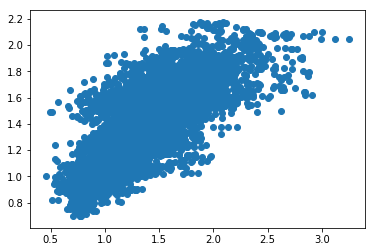

In [247]:
plt.scatter(y_test,br_preds[0])
plt.legend()
plt.show()

# Kawawa NN

In [357]:
X_train, X_test, y_train, y_test = train_test_split(scaled, Y, 
                                        test_size=0.33, random_state=5432)
# create model
kawawa_model = Sequential()
kawawa_model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
kawawa_model.add(Dense(12, activation='relu'))
kawawa_model.add(Dense(1, activation='sigmoid'))

In [358]:
# Compile model
kawawa_model.compile(loss='binary_crossentropy',
                     optimizer='adam', metrics=['mse'])

In [359]:
k_history = kawawa_model.fit(X_train, y_train, epochs=50, batch_size=72, 
                    validation_data=(X_test, y_test), 
                    verbose=2, shuffle=False)

Train on 12226 samples, validate on 6023 samples
Epoch 1/50
1s - loss: -3.1009e-01 - mean_squared_error: 0.6234 - val_loss: -2.2472e+00 - val_mean_squared_error: 0.3319
Epoch 2/50
0s - loss: -5.4608e+00 - mean_squared_error: 0.3268 - val_loss: -6.5459e+00 - val_mean_squared_error: 0.3277
Epoch 3/50
0s - loss: -6.4362e+00 - mean_squared_error: 0.3266 - val_loss: -6.5464e+00 - val_mean_squared_error: 0.3277
Epoch 4/50
0s - loss: -6.4371e+00 - mean_squared_error: 0.3266 - val_loss: -6.5475e+00 - val_mean_squared_error: 0.3277
Epoch 5/50
0s - loss: -6.4389e+00 - mean_squared_error: 0.3266 - val_loss: -6.5499e+00 - val_mean_squared_error: 0.3277
Epoch 6/50
0s - loss: -6.4426e+00 - mean_squared_error: 0.3266 - val_loss: -6.5557e+00 - val_mean_squared_error: 0.3277
Epoch 7/50
0s - loss: -6.4508e+00 - mean_squared_error: 0.3266 - val_loss: -6.5676e+00 - val_mean_squared_error: 0.3277
Epoch 8/50
0s - loss: -6.4649e+00 - mean_squared_error: 0.3266 - val_loss: -6.5828e+00 - val_mean_squared_error

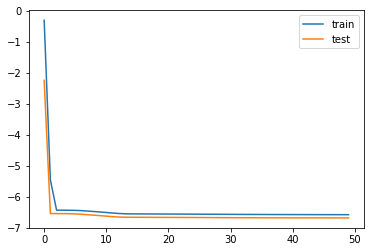

In [360]:
plt.plot(k_history.history['loss'], label='train')
plt.plot(k_history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [361]:
# make a prediction
yhat = kawawa_model.predict(X_test)
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, yhat))

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


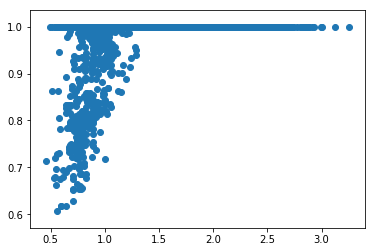

In [362]:
plt.scatter(y_test,yhat)
plt.legend()
plt.show()

In [237]:
rmse

0.570669232090119

# LSTM Models

In [350]:
X_train, X_test, y_train, y_test = train_test_split(scaled, Y, 
                                        test_size=0.33, random_state=5432)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [127]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12226, 1, 65) (6023, 1, 65) (12226,) (6023,)


In [221]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

In [222]:
history = model.fit(X_train, y_train, epochs=50, batch_size=72, 
                    validation_data=(X_test, y_test), 
                    verbose=2, shuffle=False)

Train on 12226 samples, validate on 6023 samples
Epoch 1/50
2s - loss: 0.5566 - val_loss: 0.2063
Epoch 2/50
0s - loss: 0.2000 - val_loss: 0.1972
Epoch 3/50
0s - loss: 0.1960 - val_loss: 0.1954
Epoch 4/50
0s - loss: 0.1944 - val_loss: 0.1941
Epoch 5/50
0s - loss: 0.1927 - val_loss: 0.1924
Epoch 6/50
0s - loss: 0.1910 - val_loss: 0.1908
Epoch 7/50
0s - loss: 0.1892 - val_loss: 0.1891
Epoch 8/50
0s - loss: 0.1873 - val_loss: 0.1876
Epoch 9/50
0s - loss: 0.1857 - val_loss: 0.1864
Epoch 10/50
0s - loss: 0.1845 - val_loss: 0.1854
Epoch 11/50
0s - loss: 0.1837 - val_loss: 0.1851
Epoch 12/50
0s - loss: 0.1831 - val_loss: 0.1849
Epoch 13/50
0s - loss: 0.1827 - val_loss: 0.1845
Epoch 14/50
0s - loss: 0.1824 - val_loss: 0.1841
Epoch 15/50
0s - loss: 0.1821 - val_loss: 0.1839
Epoch 16/50
0s - loss: 0.1817 - val_loss: 0.1836
Epoch 17/50
0s - loss: 0.1814 - val_loss: 0.1834
Epoch 18/50
0s - loss: 0.1810 - val_loss: 0.1832
Epoch 19/50
0s - loss: 0.1808 - val_loss: 0.1829
Epoch 20/50
0s - loss: 0.1803

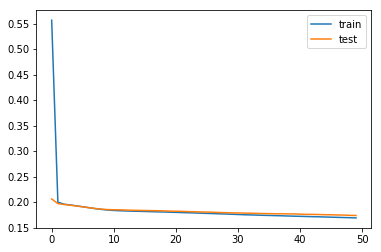

In [223]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [250]:
# make a prediction
yhat = model.predict(X_test)
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, yhat))
rmse

0.24176302753965817

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


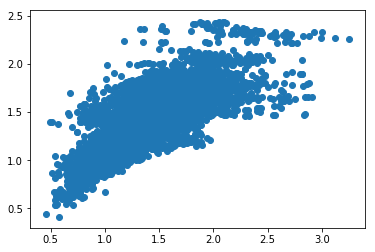

In [252]:
plt.scatter(y_test,yhat)
plt.legend()
plt.show()

In [169]:
# design network
model_stacked = Sequential()
model_stacked.add(LSTM(50, return_sequences=True,
               input_shape=(X_train.shape[1], X_train.shape[2])))
model_stacked.add(LSTM(30))
model_stacked.add(Dense(1))
model_stacked.compile(loss='mae', optimizer='adam')

In [170]:
history_stacked = model_stacked.fit(X_train, y_train,
                            epochs=50, batch_size=4000, 
                            validation_data=(X_test, y_test), 
                            verbose=2, shuffle=False)

Train on 12226 samples, validate on 6023 samples
Epoch 1/50
2s - loss: 1.4014 - val_loss: 1.3918
Epoch 2/50
0s - loss: 1.3791 - val_loss: 1.3691
Epoch 3/50
0s - loss: 1.3562 - val_loss: 1.3454
Epoch 4/50
0s - loss: 1.3320 - val_loss: 1.3195
Epoch 5/50
0s - loss: 1.3054 - val_loss: 1.2904
Epoch 6/50
0s - loss: 1.2753 - val_loss: 1.2570
Epoch 7/50
0s - loss: 1.2405 - val_loss: 1.2179
Epoch 8/50
0s - loss: 1.1997 - val_loss: 1.1715
Epoch 9/50
0s - loss: 1.1511 - val_loss: 1.1161
Epoch 10/50
0s - loss: 1.0930 - val_loss: 1.0497
Epoch 11/50
0s - loss: 1.0232 - val_loss: 0.9699
Epoch 12/50
0s - loss: 0.9395 - val_loss: 0.8742
Epoch 13/50
0s - loss: 0.8396 - val_loss: 0.7614
Epoch 14/50
0s - loss: 0.7234 - val_loss: 0.6333
Epoch 15/50
0s - loss: 0.5945 - val_loss: 0.5005
Epoch 16/50
0s - loss: 0.4674 - val_loss: 0.3867
Epoch 17/50
0s - loss: 0.3676 - val_loss: 0.3250
Epoch 18/50
0s - loss: 0.3253 - val_loss: 0.3172
Epoch 19/50
0s - loss: 0.3240 - val_loss: 0.3185
Epoch 20/50
0s - loss: 0.3206

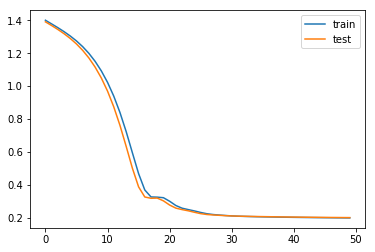

In [351]:
plt.plot(history_stacked.history['loss'], label='train')
plt.plot(history_stacked.history['val_loss'], label='test')
plt.legend()
plt.show()

In [352]:
from math import sqrt
# make a prediction
yhat = model_stacked.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, yhat))
rmse

0.2659302701796017

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


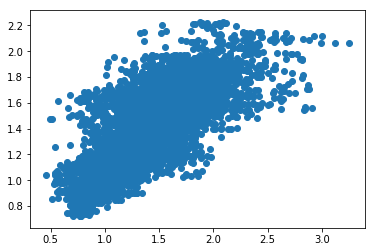

In [353]:
plt.scatter(y_test,yhat)
plt.legend()
plt.show()

# t-SNE LSTM

In [238]:
tsne = pd.read_csv("tsne_fransformed_output.csv")

In [271]:
X_tsne = pd.DataFrame(scaled).join(tsne)
X_tsne = X_tsne.values

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X_tsne, Y, 
                                        test_size=0.33, random_state=5432)

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [273]:
from keras.layers import Dropout
# design network
tsne_model = Sequential()
tsne_model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
#tsne_model.add(Dropout(0.5))
tsne_model.add(Dense(1))
tsne_model.compile(loss='mae', optimizer='adam')

In [274]:
tsne_history = tsne_model.fit(X_train, y_train, epochs=50, batch_size=72, 
                    validation_data=(X_test, y_test), 
                    verbose=2, shuffle=False)

Train on 12226 samples, validate on 6023 samples
Epoch 1/50
2s - loss: 0.3707 - val_loss: 0.2241
Epoch 2/50
0s - loss: 0.2084 - val_loss: 0.1986
Epoch 3/50
0s - loss: 0.1902 - val_loss: 0.1839
Epoch 4/50
0s - loss: 0.1777 - val_loss: 0.1735
Epoch 5/50
0s - loss: 0.1652 - val_loss: 0.1651
Epoch 6/50
0s - loss: 0.1568 - val_loss: 0.1586
Epoch 7/50
0s - loss: 0.1518 - val_loss: 0.1544
Epoch 8/50
0s - loss: 0.1480 - val_loss: 0.1507
Epoch 9/50
0s - loss: 0.1451 - val_loss: 0.1483
Epoch 10/50
0s - loss: 0.1428 - val_loss: 0.1472
Epoch 11/50
0s - loss: 0.1412 - val_loss: 0.1466
Epoch 12/50
0s - loss: 0.1398 - val_loss: 0.1476
Epoch 13/50
0s - loss: 0.1381 - val_loss: 0.1434
Epoch 14/50
0s - loss: 0.1366 - val_loss: 0.1425
Epoch 15/50
0s - loss: 0.1363 - val_loss: 0.1415
Epoch 16/50
0s - loss: 0.1348 - val_loss: 0.1405
Epoch 17/50
0s - loss: 0.1340 - val_loss: 0.1394
Epoch 18/50
0s - loss: 0.1332 - val_loss: 0.1392
Epoch 19/50
0s - loss: 0.1323 - val_loss: 0.1380
Epoch 20/50
0s - loss: 0.1318

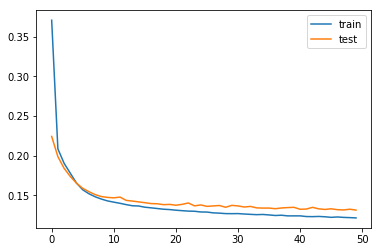

In [275]:
plt.plot(tsne_history.history['loss'], label='train')
plt.plot(tsne_history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [276]:
# make a prediction
yhat = tsne_model.predict(X_test)
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, yhat))
rmse

# NO DROPOUT = 0.18105793665451367
# DROPOUT = 0.19626291507117125

0.1821086711427757

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


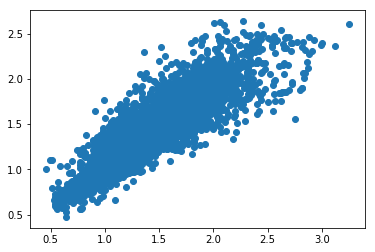

In [277]:
plt.scatter(y_test,yhat)
plt.legend()
plt.show()

# CBOE 

In [301]:
cboe = pd.read_csv('data/opt.csv',delimiter='\t')

def get_int_day_p1(x):
    dt_x = pd.to_datetime(x)
    val = dt_x - min_date
    return val.days + 1

cboe.Period = cboe.Period.map(lambda x: get_int_day_p1(x))

In [309]:
cboe.head()

Period  Corn (^C) (CBOT) Historical Pricing  \
0     332                              3.73375   
1     333                              3.70125   
2     334                              3.77000   
3     335                              3.81250   
4     336                              3.81250   

   S&P 500 Index (^SPX) Historical Pricing  \
0                              2102.632670   
1                              2079.506221   
2                              2049.615627   
3                              2091.687424   
4                              2091.687424   

   Rice - Rough #2 (CBOT) Historical Pricing  Cocoa (ICE) Historical Pricing  \
0                                     11.715                            3337   
1                                     11.395                            3333   
2                                     11.235                            3386   
3                                     11.180                            3390   
4                                     11.180                            3390   

   Coffee - Colombian (ICE) Historical Pricing  \
0                                       1.1990   
1                                       1.2045   
2                                       1.2485   
3                                       1.2695   
4                                       1.2695   

   Sugar #16 (ICE) Historical Pricing  \
0                              0.2584   
1                              0.2581   
2                              0.2584   
3                              0.2571   
4                              0.2571   

   Orange Juice - Frozen Concentrated (ICE) Historical Pricing  \
0                                             1.4045             
1                                             1.4050             
2                                             1.4070             
3                                             1.3995             
4                                             1.3995             

   Cotton #2 (ICE) Historical Pricing  Wheat - Feed (ICE) Historical Pricing  \
0                              0.6354                                    223   
1                              0.6350                                    223   
2                              0.6395                                    224   
3                              0.6471                                    224   
4                              0.6471                                    224   

   Coffee - Robusta (ICE) Historical Pricing  
0                                     4.7855  
1                                     4.7342  
2                                     4.6584  
3                                     4.7112  
4                                     4.7112

In [310]:
tmp_tha = tha.copy()
tmp_tha['date'] = tmp_tha.Date.map(lambda x: get_int_val(x))

# X = tha[['Total Volume','4046','4225','4770',
#          'Total Bags','Small Bags','Large Bags',
#          'XLarge Bags','type','region']]
# X = pd.get_dummies(X)

In [313]:
cboe_X = pd.merge(tmp_tha, cboe, left_on='date', right_on='Period')

In [314]:
cboe_X.head()

Date  AveragePrice  Total Volume       4046       4225      4770  \
0  2015-12-27          1.33      64236.62    1036.74   54454.85     48.16   
1  2015-12-27          0.99     386100.49  292097.36   27350.92    297.90   
2  2015-12-27          1.17     596819.40   40450.49  394104.02  17353.79   
3  2015-12-27          0.97      62909.69   30482.25    2971.94   5894.40   
4  2015-12-27          1.13     450816.39    3886.27  346964.70  13952.56   

   Total Bags  Small Bags  Large Bags  XLarge Bags  \
0     8696.87     8603.62       93.25         0.00   
1    66354.31    48605.95    17748.36         0.00   
2   144911.10   142543.88     2367.22         0.00   
3    23561.10    23520.19        5.69        35.22   
4    86012.86    85913.60       99.26         0.00   

                     ...                      \
0                    ...                       
1                    ...                       
2                    ...                       
3                    ...                       
4                    ...                       

  Corn (^C) (CBOT) Historical Pricing  \
0                              3.6425   
1                              3.6425   
2                              3.6425   
3                              3.6425   
4                              3.6425   

   S&P 500 Index (^SPX) Historical Pricing  \
0                                2060.9883   
1                                2060.9883   
2                                2060.9883   
3                                2060.9883   
4                                2060.9883   

  Rice - Rough #2 (CBOT) Historical Pricing  Cocoa (ICE) Historical Pricing  \
0                                    11.075                            3210   
1                                    11.075                            3210   
2                                    11.075                            3210   
3                                    11.075                            3210   
4                                    11.075                            3210   

   Coffee - Colombian (ICE) Historical Pricing  \
0                                        1.197   
1                                        1.197   
2                                        1.197   
3                                        1.197   
4                                        1.197   

   Sugar #16 (ICE) Historical Pricing  \
0                              0.2571   
1                              0.2571   
2                              0.2571   
3                              0.2571   
4                              0.2571   

   Orange Juice - Frozen Concentrated (ICE) Historical Pricing  \
0                                               1.47             
1                                               1.47             
2                                               1.47             
3                                               1.47             
4                                               1.47             

   Cotton #2 (ICE) Historical Pricing  Wheat - Feed (ICE) Historical Pricing  \
0                              0.6366                                    220   
1                              0.6366                                    220   
2                              0.6366                                    220   
3                              0.6366                                    220   
4                              0.6366                                    220   

   Coffee - Robusta (ICE) Historical Pricing  
0                                      4.609  
1                                      4.609  
2                                      4.609  
3                                      4.609  
4                                      4.609  

[5 rows x 25 columns]

In [321]:
cboe_Y = cboe_X.AveragePrice

In [322]:
cboe_X.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'date', 'Period', 'Corn (^C) (CBOT) Historical Pricing',
       'S&P 500 Index (^SPX) Historical Pricing',
       'Rice - Rough #2 (CBOT) Historical Pricing',
       'Cocoa (ICE) Historical Pricing',
       'Coffee - Colombian (ICE) Historical Pricing',
       'Sugar #16 (ICE) Historical Pricing',
       'Orange Juice - Frozen Concentrated (ICE) Historical Pricing',
       'Cotton #2 (ICE) Historical Pricing',
       'Wheat - Feed (ICE) Historical Pricing',
       'Coffee - Robusta (ICE) Historical Pricing'],
      dtype='object')

In [324]:
cboe_X = cboe_X[['Total Volume', '4046', '4225', '4770',
                   'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
                   'region', 'date', 'Period', 'Corn (^C) (CBOT) Historical Pricing',
                   'S&P 500 Index (^SPX) Historical Pricing',
                   'Rice - Rough #2 (CBOT) Historical Pricing',
                   'Cocoa (ICE) Historical Pricing',
                   'Coffee - Colombian (ICE) Historical Pricing',
                   'Sugar #16 (ICE) Historical Pricing',
                   'Orange Juice - Frozen Concentrated (ICE) Historical Pricing',
                   'Cotton #2 (ICE) Historical Pricing',
                   'Wheat - Feed (ICE) Historical Pricing',
                   'Coffee - Robusta (ICE) Historical Pricing']]
cboe_X = pd.get_dummies(cboe_X)

In [325]:
cboe_X = cboe_X.astype('float32')

In [326]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_cboe = scaler.fit_transform(cboe_X)

In [327]:
scaled_cboe

array([[1.02153113e-03, 4.55837801e-05, 2.66015290e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.17091961e-03, 1.28430490e-02, 1.33610922e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.54213776e-03, 1.77854253e-03, 1.92522237e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.42691118e-02, 5.69572709e-03, 1.44837321e-02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.74848088e-03, 1.52724038e-03, 3.07601264e-03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.73641441e-04, 1.27278354e-04, 1.15098390e-04, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [329]:
X_train, X_test, y_train, y_test = train_test_split(scaled_cboe, cboe_Y, 
                                        test_size=0.33, random_state=5432)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [330]:
# design network
cboe_model = Sequential()
cboe_model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
cboe_model.add(Dense(1))
cboe_model.compile(loss='mae', optimizer='adam')

In [331]:
cboe_history = cboe_model.fit(X_train, y_train, epochs=50, batch_size=72, 
                    validation_data=(X_test, y_test), 
                    verbose=2, shuffle=False)

Train on 8753 samples, validate on 4312 samples
Epoch 1/50
1s - loss: 0.5029 - val_loss: 0.2567
Epoch 2/50
0s - loss: 0.2336 - val_loss: 0.2174
Epoch 3/50
0s - loss: 0.2118 - val_loss: 0.2017
Epoch 4/50
0s - loss: 0.1983 - val_loss: 0.1912
Epoch 5/50
0s - loss: 0.1900 - val_loss: 0.1858
Epoch 6/50
0s - loss: 0.1851 - val_loss: 0.1825
Epoch 7/50
0s - loss: 0.1818 - val_loss: 0.1797
Epoch 8/50
0s - loss: 0.1790 - val_loss: 0.1766
Epoch 9/50
0s - loss: 0.1758 - val_loss: 0.1739
Epoch 10/50
0s - loss: 0.1727 - val_loss: 0.1709
Epoch 11/50
0s - loss: 0.1694 - val_loss: 0.1680
Epoch 12/50
0s - loss: 0.1667 - val_loss: 0.1651
Epoch 13/50
0s - loss: 0.1639 - val_loss: 0.1630
Epoch 14/50
0s - loss: 0.1616 - val_loss: 0.1608
Epoch 15/50
0s - loss: 0.1594 - val_loss: 0.1593
Epoch 16/50
0s - loss: 0.1576 - val_loss: 0.1582
Epoch 17/50
0s - loss: 0.1560 - val_loss: 0.1564
Epoch 18/50
0s - loss: 0.1546 - val_loss: 0.1555
Epoch 19/50
0s - loss: 0.1536 - val_loss: 0.1545
Epoch 20/50
0s - loss: 0.1525 

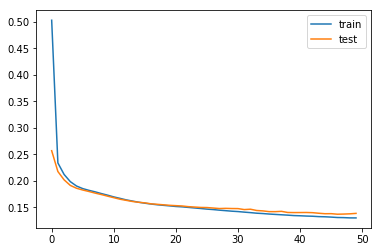

In [332]:
plt.plot(cboe_history.history['loss'], label='train')
plt.plot(cboe_history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [333]:
# make a prediction
yhat = cboe_model.predict(X_test)
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, yhat))
rmse

0.1928972528173748

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


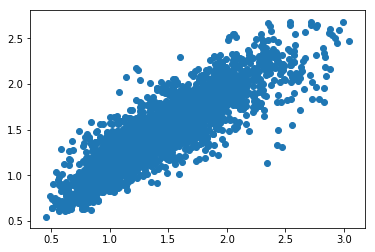

In [334]:
plt.scatter(y_test,yhat)
plt.legend()
plt.show()

In [335]:
from sklearn.manifold import TSNE

#model = TSNE(learning_rate=100)
#transformed = model.fit_transform(cboe_X)

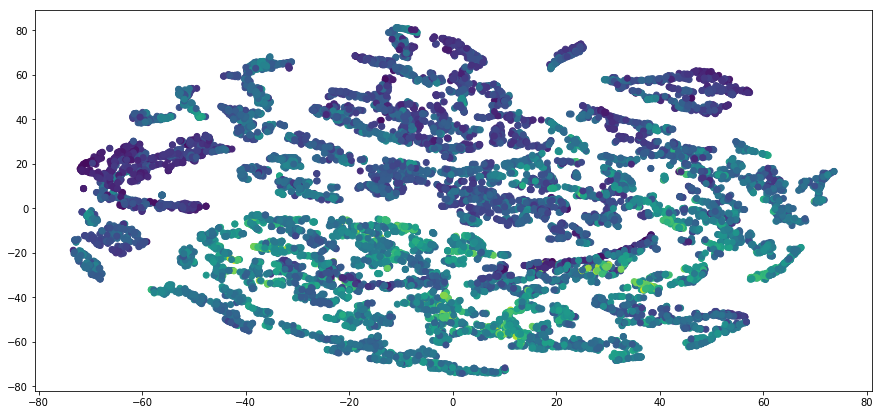

In [337]:
# Plotting 2d t-Sne
plt.figure(figsize=(15,7))
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=cboe_Y)
plt.show()

In [340]:
cboe_X_tsne = cboe_X.join(pd.DataFrame(transformed))

In [341]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_cboe_tsne = scaler.fit_transform(cboe_X_tsne)

In [342]:
X_train, X_test, y_train, y_test = train_test_split(scaled_cboe_tsne, cboe_Y, 
                                        test_size=0.33, random_state=5432)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [349]:
X_train.shape

(8753, 1, 79)

In [343]:
# design network
cboe_tsne_model = Sequential()
cboe_tsne_model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
cboe_tsne_model.add(Dense(1))
cboe_tsne_model.compile(loss='mae', optimizer='adam')

In [344]:
cboe_tsne_history = cboe_tsne_model.fit(X_train, y_train, epochs=50, batch_size=72, 
                    validation_data=(X_test, y_test), 
                    verbose=2, shuffle=False)

Train on 8753 samples, validate on 4312 samples
Epoch 1/50
1s - loss: 0.4738 - val_loss: 0.2478
Epoch 2/50
0s - loss: 0.2282 - val_loss: 0.2131
Epoch 3/50
0s - loss: 0.2101 - val_loss: 0.2010
Epoch 4/50
0s - loss: 0.1991 - val_loss: 0.1923
Epoch 5/50
0s - loss: 0.1910 - val_loss: 0.1864
Epoch 6/50
0s - loss: 0.1857 - val_loss: 0.1824
Epoch 7/50
0s - loss: 0.1815 - val_loss: 0.1787
Epoch 8/50
0s - loss: 0.1778 - val_loss: 0.1752
Epoch 9/50
0s - loss: 0.1743 - val_loss: 0.1715
Epoch 10/50
0s - loss: 0.1708 - val_loss: 0.1682
Epoch 11/50
0s - loss: 0.1675 - val_loss: 0.1652
Epoch 12/50
0s - loss: 0.1644 - val_loss: 0.1625
Epoch 13/50
0s - loss: 0.1615 - val_loss: 0.1602
Epoch 14/50
0s - loss: 0.1591 - val_loss: 0.1581
Epoch 15/50
0s - loss: 0.1571 - val_loss: 0.1566
Epoch 16/50
0s - loss: 0.1553 - val_loss: 0.1551
Epoch 17/50
0s - loss: 0.1536 - val_loss: 0.1538
Epoch 18/50
0s - loss: 0.1520 - val_loss: 0.1530
Epoch 19/50
0s - loss: 0.1509 - val_loss: 0.1524
Epoch 20/50
0s - loss: 0.1499 

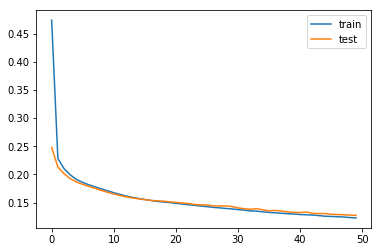

In [345]:
plt.plot(cboe_tsne_history.history['loss'], label='train')
plt.plot(cboe_tsne_history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [347]:
# make a prediction
yhat = cboe_tsne_model.predict(X_test)
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, yhat))
rmse

0.18060083345484157

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


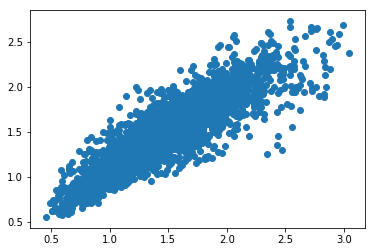

In [348]:
plt.scatter(y_test,yhat)
plt.legend()
plt.show()

# Hyperparameter Optimized Random Forest Regression

In [369]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [374]:
X_train, X_test, y_train, y_test = train_test_split(scaled_cboe_tsne, cboe_Y, 
                                        test_size=0.20, random_state=5432)

In [ ]:
RandomForestRegressor()

In [365]:
grid = {'bootstrap': [True, False],
         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_leaf': [1, 2, 4],
         'min_samples_split': [2, 5, 10],
         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [376]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = grid,
                                           n_iter = 5, cv = 3, verbose=2, 
                                           random_state=5432, n_jobs = -1)

In [377]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] max_depth=30, min_samples_split=10, min_samples_leaf=1, n_estimators=1800, max_features=auto, bootstrap=False 
[CV] max_depth=30, min_samples_split=10, min_samples_leaf=1, n_estimators=1800, max_features=auto, bootstrap=False 
[CV]  max_depth=30, min_samples_split=10, min_samples_leaf=1, n_estimators=1800, max_features=auto, bootstrap=False, total= 4.5min
[CV] max_depth=30, min_samples_split=10, min_samples_leaf=1, n_estimators=1800, max_features=auto, bootstrap=False 
[CV]  max_depth=30, min_samples_split=10, min_samples_leaf=1, n_estimators=1800, max_features=auto, bootstrap=False, total= 4.6min
[CV] max_depth=60, min_samples_split=10, min_samples_leaf=2, n_estimators=400, max_features=sqrt, bootstrap=True 
[CV]  max_depth=60, min_samples_split=10, min_samples_leaf=2, n_estimators=400, max_features=sqrt, bootstrap=True, total=   5.2s
[CV] max_depth=60, min_samples_split=10, min_samples_leaf=2, n_estimators=400, max_feat

[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 12.1min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=5432, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [378]:
rf_random.best_score_

0.8712813399143036

In [395]:
# make a prediction
yhat = rf_random.predict(X_test)
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, yhat))
rmse

0.1293035088484891

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


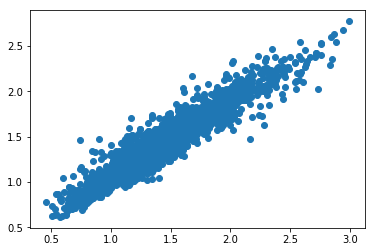

In [396]:
plt.scatter(y_test,yhat)
plt.legend()
plt.show()

In [393]:
list(rf_random.best_params_.values())

[None, 10, 1, 2000, 'sqrt', False]

In [394]:
pd.DataFrame( {'Parameter' : list(rf_random.best_params_.keys()),
              'Optimized Choice' : list(rf_random.best_params_.values())} )

Optimized Choice          Parameter
0             None          max_depth
1               10  min_samples_split
2                1   min_samples_leaf
3             2000       n_estimators
4             sqrt       max_features
5            False          bootstrap

In [386]:
pd.DataFrame(rf_random.cv_results_)

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0     270.099517         1.158401         0.754155          0.966129   
1       4.935142         0.228774         0.831643          0.921902   
2     113.859551         0.505016         0.746365          0.953371   
3      29.528278         0.981393         0.846774          0.950003   
4      39.792486         1.311979         0.871281          0.976848   

  param_bootstrap param_max_depth param_max_features param_min_samples_leaf  \
0           False              30               auto                      1   
1            True              60               sqrt                      2   
2           False             100               auto                      4   
3           False              30               sqrt                      4   
4           False            None               sqrt                      1   

  param_min_samples_split param_n_estimators       ...         \
0                      10               1800       ...          
1                      10                400       ...          
2                       5                800       ...          
3                       5               1600       ...          
4                      10               2000       ...          

  split0_test_score  split0_train_score  split1_test_score  \
0          0.769474            0.966067           0.758181   
1          0.838093            0.920285           0.827710   
2          0.766671            0.951898           0.755313   
3          0.854781            0.949039           0.841278   
4          0.878655            0.976335           0.866543   

   split1_train_score  split2_test_score  split2_train_score  std_fit_time  \
0            0.966137           0.734809            0.966181      2.484330   
1            0.922608           0.829125            0.922813      0.038614   
2            0.953859           0.717110            0.954357      0.495131   
3            0.950014           0.844262            0.950958      0.161076   
4            0.976911           0.868646            0.977298      0.026949   

   std_score_time  std_test_score  std_train_score  
0        0.004799        0.014436         0.000047  
1        0.001978        0.004598         0.001146  
2        0.007035        0.021200         0.001061  
3        0.003006        0.005792         0.000783  
4        0.009192        0.005284         0.000396  

[5 rows x 22 columns]